In [289]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc, roc_auc_score
from itertools import cycle
import warnings
import xgboost as xgb
from sklearn.feature_selection import f_regression
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from mlxtend.classifier import StackingCVClassifier
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import statsmodels.api as sm
from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import label_binarize

In [290]:
df = pd.read_csv("Thessaloniki_classification.csv")

In [291]:
warnings.filterwarnings("ignore")

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     373 non-null    int64  
 1   Driver_licence             373 non-null    int64  
 2   Truck_licence              373 non-null    int64  
 3   Motor_licence              373 non-null    int64  
 4   Car_access                 373 non-null    int64  
 5   Bike_access                373 non-null    int64  
 6   Skate_access               373 non-null    int64  
 7   Motor_access               373 non-null    int64  
 8   Hsize                      373 non-null    int64  
 9   Vehicles                   373 non-null    int64  
 10  Mode                       373 non-null    int64  
 11  Time                       373 non-null    int64  
 12  Convenience                373 non-null    int64  
 13  Cost                       373 non-null    int64  

In [293]:
drops = ["Mode"]
X = df.drop(drops, axis=1)

<Axes: >

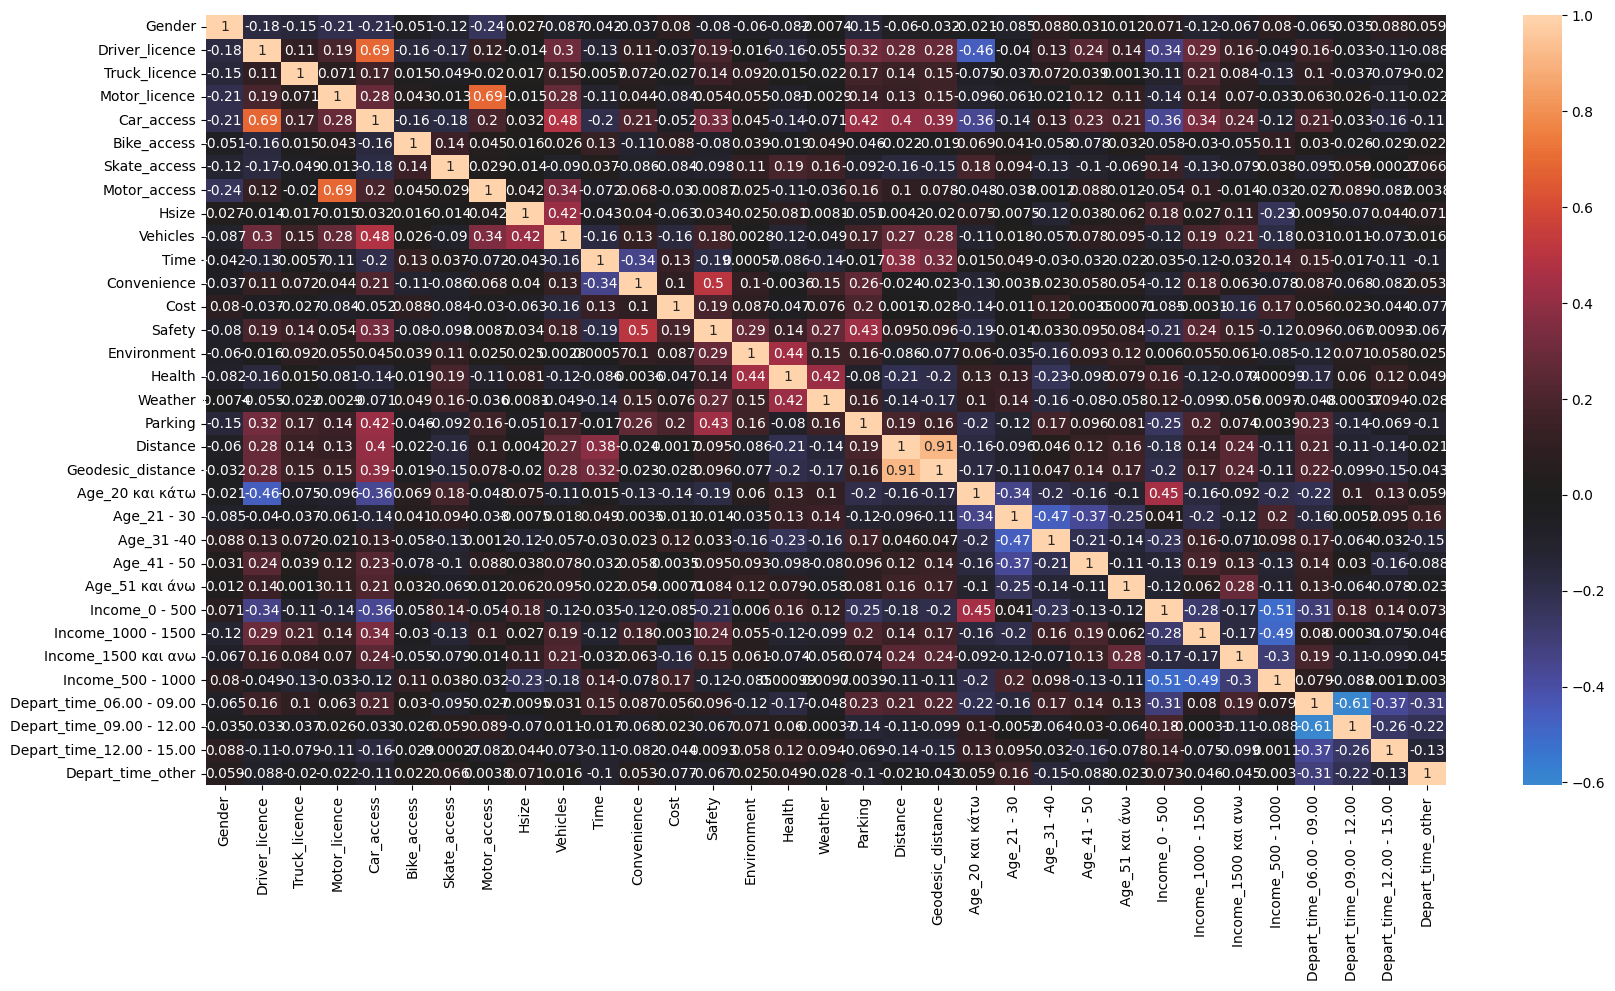

In [294]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrMatrix, annot=True, center=0, ax=ax)

In [295]:
df.columns

Index(['Gender', 'Driver_licence', 'Truck_licence', 'Motor_licence',
       'Car_access', 'Bike_access', 'Skate_access', 'Motor_access', 'Hsize',
       'Vehicles', 'Mode', 'Time', 'Convenience', 'Cost', 'Safety',
       'Environment', 'Health', 'Weather', 'Parking', 'Distance',
       'Geodesic_distance', 'Age_20 και κάτω', 'Age_21 - 30', 'Age_31 -40',
       'Age_41 - 50', 'Age_51 και άνω', 'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other'],
      dtype='object')

In [296]:
drops = [ 'Driver_licence','Motor_licence',
       'Car_access','Motor_access',
       'Vehicles', 'Mode',
       'Geodesic_distance']
X = df.drop(drops, axis=1)
y = df["Mode"]

In [297]:
drops = ['Driver_licence', 'Motor_licence',
       'Car_access', 'Motor_access',
       'Vehicles', 'Mode',
       'Geodesic_distance', 'Age_21 - 30', 'Age_31 -40','Age_20 και κάτω', 'Age_41 - 50', 'Age_51 και άνω',
       'Income_0 - 500', 'Income_1000 - 1500',
       'Income_1500 και ανω', 'Income_500 - 1000', 'Depart_time_06.00 - 09.00',
       'Depart_time_09.00 - 12.00', 'Depart_time_12.00 - 15.00',
       'Depart_time_other']
X1 = df.drop(drops, axis=1)
y1 = df["Mode"]

In [298]:
X.columns

Index(['Gender', 'Truck_licence', 'Bike_access', 'Skate_access', 'Hsize',
       'Time', 'Convenience', 'Cost', 'Safety', 'Environment', 'Health',
       'Weather', 'Parking', 'Distance', 'Age_20 και κάτω', 'Age_21 - 30',
       'Age_31 -40', 'Age_41 - 50', 'Age_51 και άνω', 'Income_0 - 500',
       'Income_1000 - 1500', 'Income_1500 και ανω', 'Income_500 - 1000',
       'Depart_time_06.00 - 09.00', 'Depart_time_09.00 - 12.00',
       'Depart_time_12.00 - 15.00', 'Depart_time_other'],
      dtype='object')

In [299]:
X1.columns

Index(['Gender', 'Truck_licence', 'Bike_access', 'Skate_access', 'Hsize',
       'Time', 'Convenience', 'Cost', 'Safety', 'Environment', 'Health',
       'Weather', 'Parking', 'Distance'],
      dtype='object')

In [300]:
X

,Gender,Truck_licence,Bike_access,Skate_access,Hsize,Time,Convenience,Cost,Safety,Environment,...,Age_41 - 50,Age_51 και άνω,Income_0 - 500,Income_1000 - 1500,Income_1500 και ανω,Income_500 - 1000,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00,Depart_time_other
0,0,0,0,0,4,60,1,3,2,4,...,0,0,0,0,0,1,0,1,0,0
1,0,0,0,0,3,40,4,4,4,2,...,0,0,0,0,0,1,1,0,0,0
2,1,0,0,0,3,35,4,5,3,2,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,4,6,5,3,3,3,...,0,0,0,0,0,1,1,0,0,0
4,0,0,0,0,3,46,5,5,5,2,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0,0,0,0,4,18,5,3,5,3,...,0,0,0,1,0,0,0,0,1,0
369,1,0,0,0,1,60,3,5,3,5,...,1,0,0,0,0,1,0,1,0,0
370,0,0,1,1,3,44,4,3,3,4,...,0,0,0,0,0,1,1,0,0,0
371,1,0,0,0,3,18,4,5,3,4,...,0,0,0,0,0,1,0,0,1,0


In [301]:
X1

,Gender,Truck_licence,Bike_access,Skate_access,Hsize,Time,Convenience,Cost,Safety,Environment,Health,Weather,Parking,Distance
0,0,0,0,0,4,60,1,3,2,4,5,3,4,8.00
1,0,0,0,0,3,40,4,4,4,2,2,2,3,7.60
2,1,0,0,0,3,35,4,5,3,2,1,4,2,6.60
3,1,0,0,0,4,6,5,3,3,3,3,5,3,0.35
4,0,0,0,0,3,46,5,5,5,2,3,5,5,19.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,0,0,0,0,4,18,5,3,5,3,3,3,5,8.60
369,1,0,0,0,1,60,3,5,3,5,3,3,3,9.70
370,0,0,1,1,3,44,4,3,3,4,5,5,3,3.20
371,1,0,0,0,3,18,4,5,3,4,3,3,3,2.20


In [302]:
X, y = shuffle(X, y, random_state=42)

In [303]:
X1, y1 = shuffle(X1, y1, random_state=42)

# Split Ratio of 60 : 40

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state =42, stratify=y)

In [305]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.4, random_state =42, stratify=y1)

In [306]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    78
1    73
2    72
Name: count, dtype: int64

Class counts in y_test:
Mode
0    52
2    49
1    49
Name: count, dtype: int64


In [307]:
undersampler = RandomUnderSampler(sampling_strategy={0: 72}, random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [308]:
undersampler = RandomUnderSampler(sampling_strategy={1: 72}, random_state=42)
X_train, y_train = undersampler.fit_resample(X_train, y_train)

In [309]:
undersampler = RandomUnderSampler(sampling_strategy={0: 72}, random_state=42)
X1_train, y1_train = undersampler.fit_resample(X1_train, y1_train)

In [310]:
undersampler = RandomUnderSampler(sampling_strategy={1: 72}, random_state=42)
X1_train, y1_train = undersampler.fit_resample(X1_train, y1_train)

In [311]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

print("Class counts in y_train:")
print(y_train_series.value_counts())

print("\nClass counts in y_test:")
print(y_test_series.value_counts())

Class counts in y_train:
Mode
0    72
1    72
2    72
Name: count, dtype: int64

Class counts in y_test:
Mode
0    52
2    49
1    49
Name: count, dtype: int64


In [312]:
y1_train_series = pd.Series(y1_train)
y1_test_series = pd.Series(y1_test)

print("Class counts in y_train:")
print(y1_train_series.value_counts())

print("\nClass counts in y_test:")
print(y1_test_series.value_counts())

Class counts in y_train:
Mode
0    72
1    72
2    72
Name: count, dtype: int64

Class counts in y_test:
Mode
0    52
2    49
1    49
Name: count, dtype: int64


In [313]:
X_train

,Gender,Truck_licence,Bike_access,Skate_access,Hsize,Time,Convenience,Cost,Safety,Environment,...,Age_41 - 50,Age_51 και άνω,Income_0 - 500,Income_1000 - 1500,Income_1500 και ανω,Income_500 - 1000,Depart_time_06.00 - 09.00,Depart_time_09.00 - 12.00,Depart_time_12.00 - 15.00,Depart_time_other
116,0,0,0,0,5,21,5,1,3,3,...,1,0,0,0,1,0,1,0,0,0
65,0,0,0,0,3,15,3,5,3,3,...,0,0,0,0,0,1,0,1,0,0
75,0,0,0,0,1,26,3,4,2,3,...,0,0,0,0,0,1,1,0,0,0
186,0,1,0,0,3,20,4,4,4,4,...,0,0,0,1,0,0,1,0,0,0
47,0,0,0,0,4,13,5,1,5,5,...,1,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0,0,1,1,3,16,3,3,3,3,...,0,0,1,0,0,0,0,1,0,0
205,1,0,0,0,5,14,3,2,3,3,...,0,0,1,0,0,0,0,0,0,1
244,1,0,0,0,5,15,5,3,2,4,...,0,0,1,0,0,0,0,1,0,0
261,0,0,0,0,4,18,3,3,3,4,...,0,0,1,0,0,0,0,0,1,0


# Logistic Regression

In [462]:
log_reg=LogisticRegression(multi_class='ovr', C=1, max_iter=100)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_train)
Log_Report = classification_report(y_train, y_pred_log)
print('Logistic Regression Report:', Log_Report, sep='\n')

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        72
           1       0.96      0.96      0.96        72
           2       0.97      0.99      0.98        72

    accuracy                           0.96       216
   macro avg       0.96      0.96      0.96       216
weighted avg       0.96      0.96      0.96       216



In [463]:
y_pred_log = log_reg.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Logistic Regression Report:', Log_Report, sep='\n')

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        52
           1       0.94      0.92      0.93        49
           2       0.92      0.98      0.95        49

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [464]:
coefficients = log_reg.coef_
coefficients_df = pd.DataFrame(coefficients, columns=X.columns)
coefficients_df = coefficients_df.transpose()
print("Coefficients for each class:")
print(coefficients_df)

Coefficients for each class:
                                  0         1         2
Gender                    -0.264690  1.041100 -0.895767
Truck_licence              0.043670 -0.049577  0.066486
Bike_access               -0.649682  0.108755  0.347206
Skate_access              -0.278949 -1.054698  0.585710
Hsize                     -0.039006 -0.108490 -0.019343
Time                      -0.450153  0.176131  0.247988
Convenience                0.289597 -0.398759  0.128215
Cost                      -1.145441  0.781685 -0.230513
Safety                     0.826266  0.123874  0.017469
Environment               -0.018885 -0.161018 -0.032455
Health                    -1.067306 -0.890244  0.845287
Weather                   -0.143187 -0.841221  0.674844
Parking                    0.193583 -0.285508 -0.026944
Distance                   0.823541 -0.219669 -2.763036
Age_20 και κάτω           -0.229609  0.164929  0.235405
Age_21 - 30               -0.895405  0.310862 -0.387157
Age_31 -40         

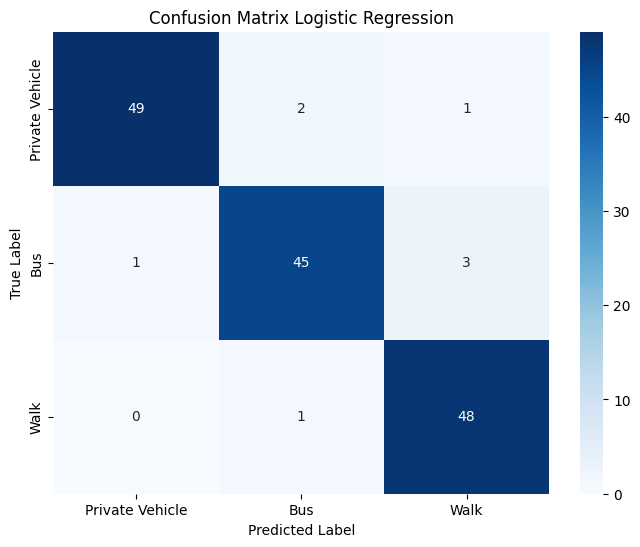

In [447]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [348]:
class_labels_mapping = {
    0: 'private vehicle',
    1: 'bus',
    2: 'walk'
}

In [349]:
label_binarizer = LabelBinarizer()
label_binarizer.fit(y_train)
y_test_bin = label_binarizer.transform(y_test)
classes = label_binarizer.classes_

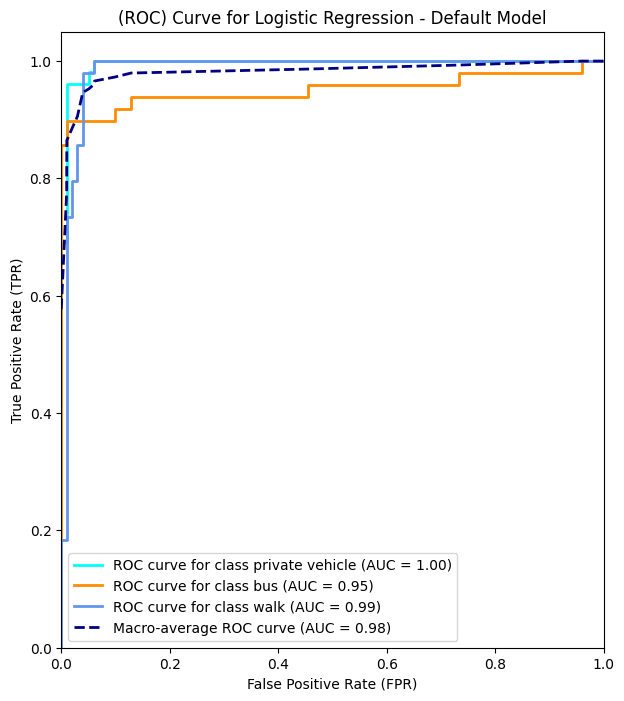

In [350]:
class_probabilities_log = log_reg.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes1)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin1[:, i], class_probabilities_log[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes1))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes1)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes1)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(classes1, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("(ROC) Curve for Logistic Regression - Default Model")

plt.show()

In [351]:
roc_auc['macro']

0.9817362833502459

In [448]:
log_reg=LogisticRegression(multi_class='ovr')

In [449]:
param_grid = {'C':[0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.8, 0.9, 1],
              'max_iter': [100, 150, 200]}

In [450]:
grid_search_log = GridSearchCV(log_reg, param_grid, cv=10, scoring='accuracy', n_jobs=-1)

In [451]:
grid_search_log.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(multi_class='ovr'), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1],
                         'max_iter': [100, 150, 200]},
             scoring='accuracy')

In [452]:
log_params = grid_search_log.best_params_
print(log_params)

{'C': 0.1, 'max_iter': 100}


In [453]:
logreg_model=grid_search_log.best_estimator_
y_pred_log = logreg_model.predict(X_test)
Log_Report = classification_report(y_test, y_pred_log)
print('Logistic Regression Report:', Log_Report, sep='\n')

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.98      0.88      0.92        49
           2       0.91      1.00      0.95        49

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [454]:
coefficients = logreg_model.coef_
coefficients_df = pd.DataFrame(coefficients, columns=X.columns)
coefficients_df = coefficients_df.transpose()
print("Coefficients for each class:")
print(coefficients_df)

Coefficients for each class:
                                  0         1         2
Gender                    -0.075220  0.424452 -0.237226
Truck_licence              0.001439 -0.015227  0.014497
Bike_access               -0.083228  0.015978  0.073165
Skate_access              -0.068211 -0.256195  0.159092
Hsize                     -0.026047 -0.068761  0.053624
Time                      -0.287535  0.141366  0.109117
Convenience                0.188895 -0.262804  0.087691
Cost                      -0.429362  0.511688 -0.190660
Safety                     0.336458  0.007514 -0.092739
Environment               -0.057198 -0.126091  0.063580
Health                    -0.438389 -0.612728  0.543678
Weather                   -0.122618 -0.559855  0.482393
Parking                    0.258003 -0.255015 -0.066484
Distance                   0.610188 -0.161640 -1.320049
Age_20 και κάτω           -0.105941  0.045820  0.089742
Age_21 - 30               -0.232950  0.053621 -0.019705
Age_31 -40         

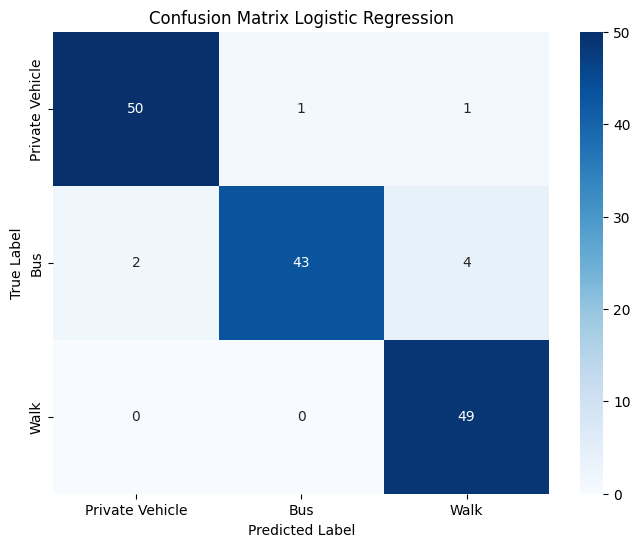

In [455]:
class_labels = ["Private Vehicle", "Bus", "Walk"]

conf_matrix_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

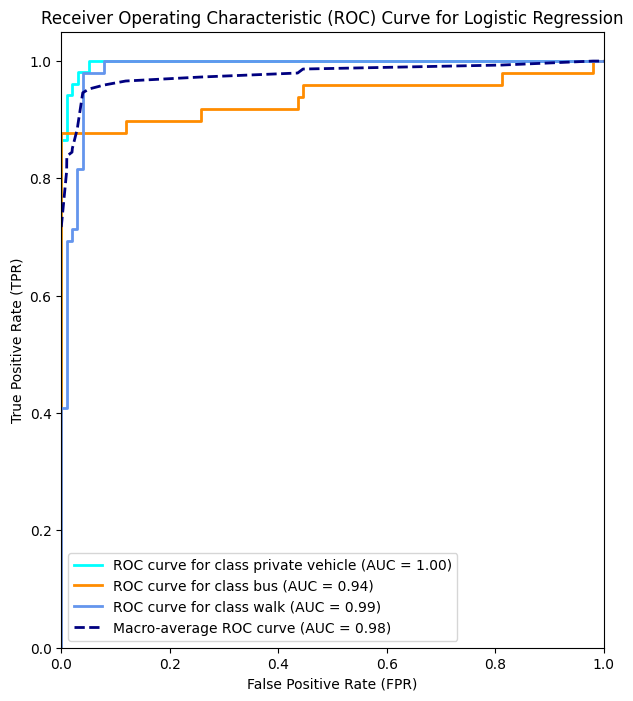

In [456]:
class_probabilities_log = logreg_model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes1)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin1[:, i], class_probabilities_log[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes1))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes1)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes1)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(classes1, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Logistic Regression")

plt.show()

In [457]:
roc_auc['macro']

0.9776698779671964

# experimenting with fewer features

In [504]:
log_reg=LogisticRegression(multi_class='ovr')
param_grid = {'C':[0.1, 0.2, 0.3, 0.4, 0.5,0.6, 0.8, 0.9, 1],
              'max_iter': [100, 150, 200]}
grid_search_log = GridSearchCV(log_reg, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_log.fit(X1_train, y1_train)
log_params = grid_search_log.best_params_
print(log_params)

{'C': 0.1, 'max_iter': 100}


In [506]:
logreg_model=grid_search_log.best_estimator_
y_pred_log = logreg_model.predict(X1_train)
Log_Report = classification_report(y1_train, y_pred_log)
print('Log_Report:', Log_Report, sep='\n')

Log_Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        72
           1       0.94      0.94      0.94        72
           2       0.96      1.00      0.98        72

    accuracy                           0.96       216
   macro avg       0.96      0.96      0.96       216
weighted avg       0.96      0.96      0.96       216



In [507]:
logreg_model=grid_search_log.best_estimator_
y_pred_log = logreg_model.predict(X1_test)
Log_Report = classification_report(y1_test, y_pred_log)
print('Logistic Regression Report:', Log_Report, sep='\n')

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        52
           1       0.96      0.88      0.91        49
           2       0.92      0.96      0.94        49

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



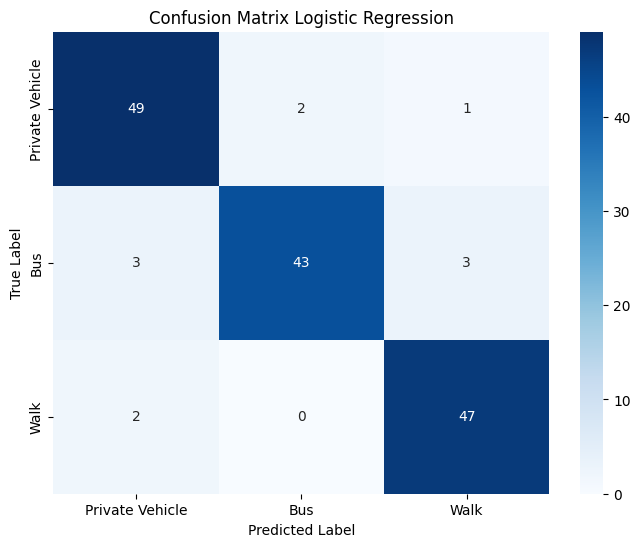

In [508]:
class_labels = ["Private Vehicle", "Bus", "Walk"]

conf_matrix_log = confusion_matrix(y1_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [478]:
coefficients = logreg_model.coef_
coefficients_df = pd.DataFrame(coefficients, columns=X1.columns)
coefficients_df = coefficients_df.transpose()
print("Coefficients for each class:")
print(coefficients_df)

Coefficients for each class:
                      0         1         2
Gender        -0.088378  0.430706 -0.232759
Truck_licence -0.001877 -0.016171  0.013880
Bike_access   -0.078979  0.009120  0.071779
Skate_access  -0.081343 -0.264651  0.164915
Hsize         -0.031722 -0.047045  0.054834
Time          -0.291358  0.140174  0.110065
Convenience    0.210779 -0.258874  0.081039
Cost          -0.424202  0.496444 -0.199404
Safety         0.362353 -0.001339 -0.104486
Environment   -0.049413 -0.116398  0.065031
Health        -0.432064 -0.609450  0.548846
Weather       -0.137409 -0.549540  0.492489
Parking        0.292587 -0.281748 -0.084343
Distance       0.634562 -0.161343 -1.329691


In [479]:
class_labels_mapping = {
    0: 'private vehicle',
    1: 'bus',
    2: 'walk'
}

In [480]:
label_binarizer1 = LabelBinarizer()
label_binarizer1.fit(y1_train)
y_test_bin1 = label_binarizer1.transform(y1_test)
classes1 = label_binarizer1.classes_

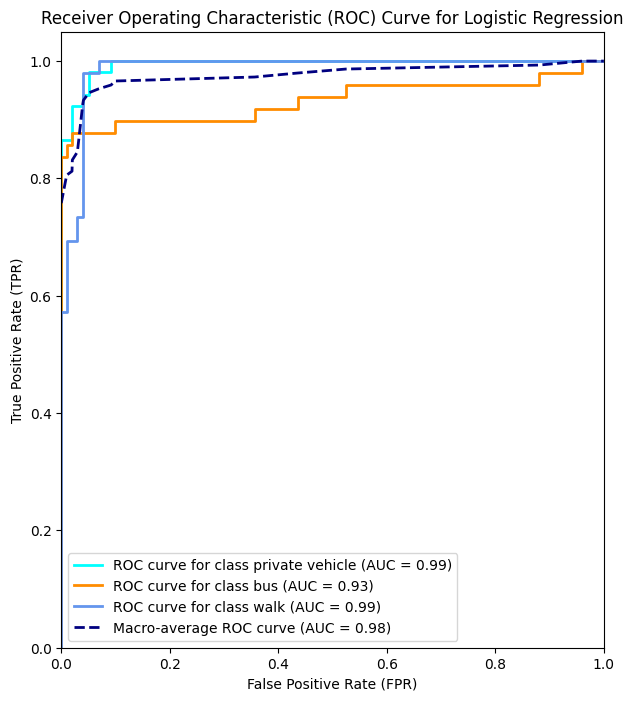

In [481]:
class_probabilities_log = logreg_model.predict_proba(X1_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes1)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin1[:, i], class_probabilities_log[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes1))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes1)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes1)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(classes1, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Logistic Regression")

plt.show()

In [482]:
roc_auc["macro"]

0.9751295566954574

# Decision Tree

In [134]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
max_depth = dt_model.tree_.max_depth
max_depth

7

In [135]:
y_pred_test = dt_model.predict(X_train)
Tree_Report = classification_report(y_train, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        72

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



In [136]:
y_pred_test = dt_model.predict(X_test)
Tree_Report = classification_report(y_test, y_pred_test)
print('Tree_Report:', Tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        52
           1       0.87      0.84      0.85        49
           2       0.82      0.96      0.89        49

    accuracy                           0.88       150
   macro avg       0.88      0.88      0.88       150
weighted avg       0.89      0.88      0.88       150



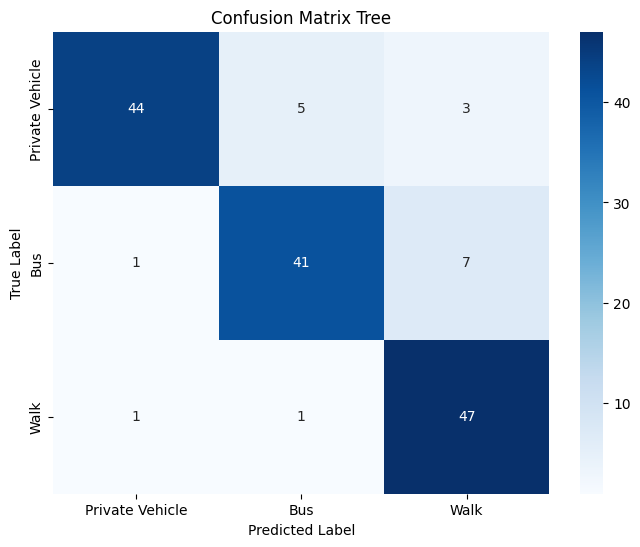

In [137]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [138]:
param_grid = {
    'max_depth': list(range(2, 8))
}

grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1, param_grid={'max_depth': [2, 3, 4, 5, 6, 7]},
             scoring='accuracy')

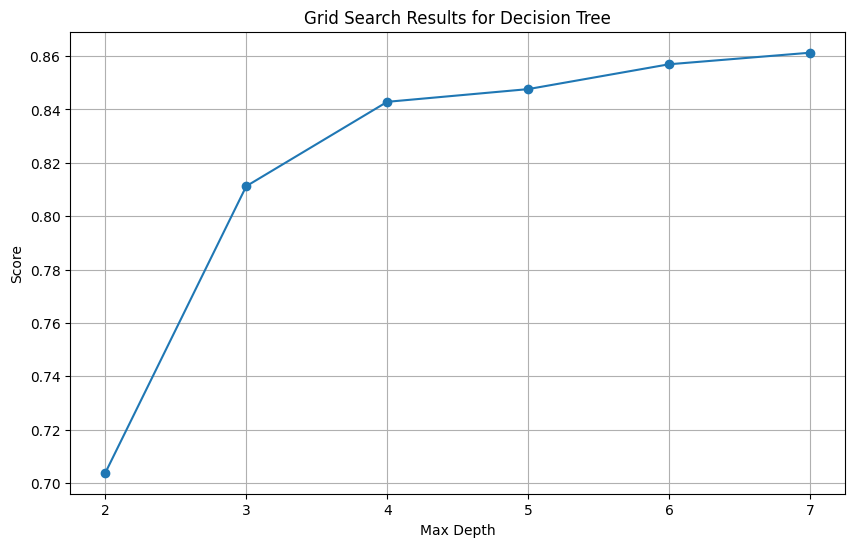

In [139]:
results = grid_search_dt.cv_results_
max_depth_values = results['param_max_depth'].data
mean_accuracy = results['mean_test_score']
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mean_accuracy, marker='o')
plt.title('Grid Search Results for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [140]:
dt_model = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7],
    'min_samples_split': [1, 2, 3, 4,  5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
}
grid_search_dt = GridSearchCV(dt_model, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [141]:
bestp = grid_search_dt.best_params_
bestp

{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 8}

In [142]:
score = grid_search_dt.best_score_
score

0.8893939393939394

In [143]:
tree=grid_search_dt.best_estimator_
y_pred_log = tree.predict(X_train)
Log_Report = classification_report(y_train, y_pred_log)
print('Tree_Report:', Log_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        72
           1       0.94      0.94      0.94        72
           2       0.97      0.96      0.97        72

    accuracy                           0.95       216
   macro avg       0.95      0.95      0.95       216
weighted avg       0.95      0.95      0.95       216



In [144]:
y_pred_tree = tree.predict(X_test)
tree_Report = classification_report(y_test, y_pred_tree)
print('Tree_Report:', tree_Report, sep='\n')

Tree_Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91        52
           1       0.88      0.86      0.87        49
           2       0.85      0.96      0.90        49

    accuracy                           0.89       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150



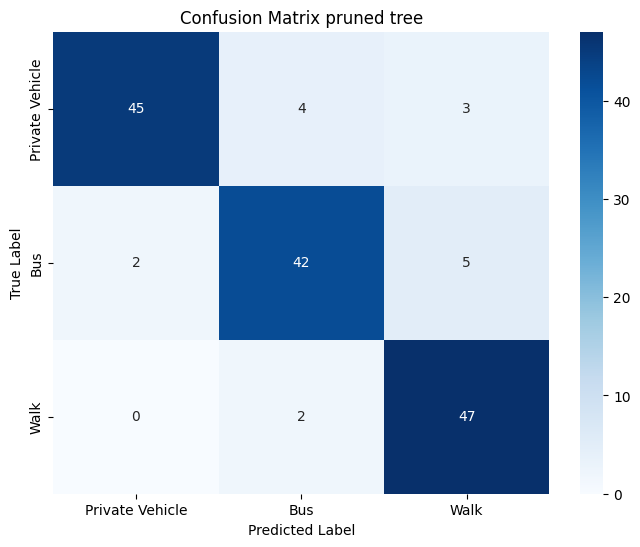

In [145]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_dt = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix pruned tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [146]:
X.columns

Index(['Gender', 'Truck_licence', 'Bike_access', 'Skate_access', 'Hsize',
       'Time', 'Convenience', 'Cost', 'Safety', 'Environment', 'Health',
       'Weather', 'Parking', 'Distance', 'Age_20 και κάτω', 'Age_21 - 30',
       'Age_31 -40', 'Age_41 - 50', 'Age_51 και άνω', 'Income_0 - 500',
       'Income_1000 - 1500', 'Income_1500 και ανω', 'Income_500 - 1000',
       'Depart_time_06.00 - 09.00', 'Depart_time_09.00 - 12.00',
       'Depart_time_12.00 - 15.00', 'Depart_time_other'],
      dtype='object')

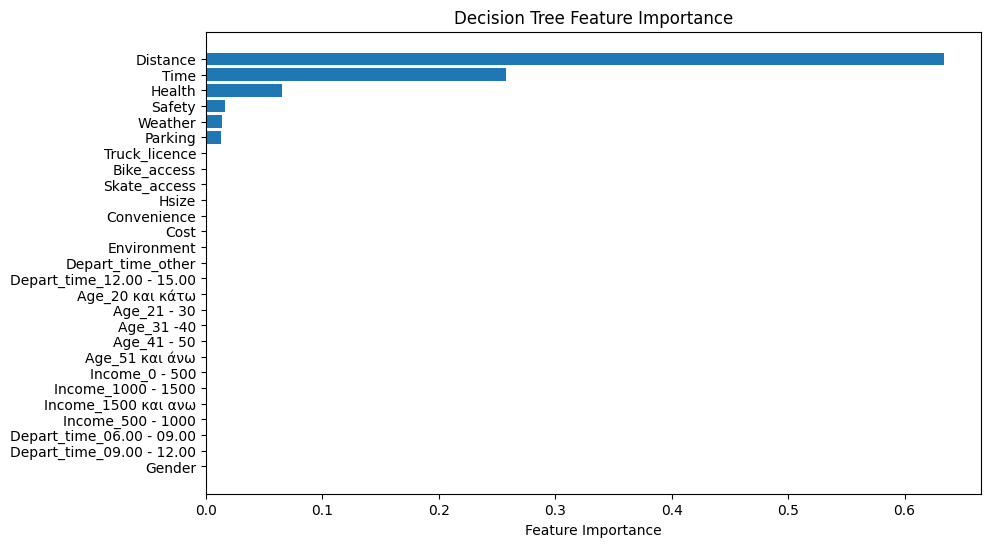

In [147]:
feature_importances = tree.feature_importances_

feature_names = ['Gender', 'Truck_licence', 'Bike_access', 'Skate_access', 'Hsize',
       'Time', 'Convenience', 'Cost', 'Safety', 'Environment', 'Health',
       'Weather', 'Parking', 'Distance', 'Age_20 και κάτω', 'Age_21 - 30',
       'Age_31 -40', 'Age_41 - 50', 'Age_51 και άνω', 'Income_0 - 500',
       'Income_1000 - 1500', 'Income_1500 και ανω', 'Income_500 - 1000',
       'Depart_time_06.00 - 09.00', 'Depart_time_09.00 - 12.00',
       'Depart_time_12.00 - 15.00', 'Depart_time_other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

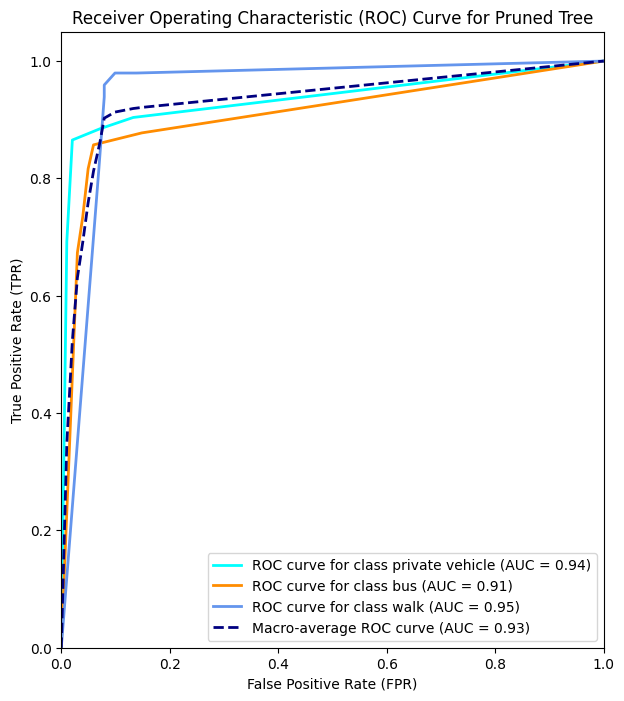

In [148]:
class_probabilities_tree = tree.predict_proba(X_test)
y_pred_prob_tree = np.argmax(class_probabilities_tree, axis=1)
y_test_bin_tree = label_binarize(y_test, classes=tree.classes_)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(tree.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_tree[:, i], class_probabilities_tree[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(tree.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(tree.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(tree.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(tree.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Pruned Tree")

plt.show()

In [149]:
roc_auc["macro"]

0.9312470255211213

# Random Forest

In [150]:
X_train.shape, X_test.shape

((216, 27), (150, 27))

In [151]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf_basic = rf_model.predict(X_train)
reportrfbasic = classification_report(y_train, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        72
           2       1.00      1.00      1.00        72

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216



In [152]:
y_pred_rf_basic = rf_model.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
confm = confusion_matrix(y_test, y_pred_rf_basic)
print(reportrfbasic)
print(confm)

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        52
           1       0.86      0.78      0.82        49
           2       0.84      0.88      0.86        49

    accuracy                           0.83       150
   macro avg       0.84      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

[[44  4  4]
 [ 7 38  4]
 [ 4  2 43]]


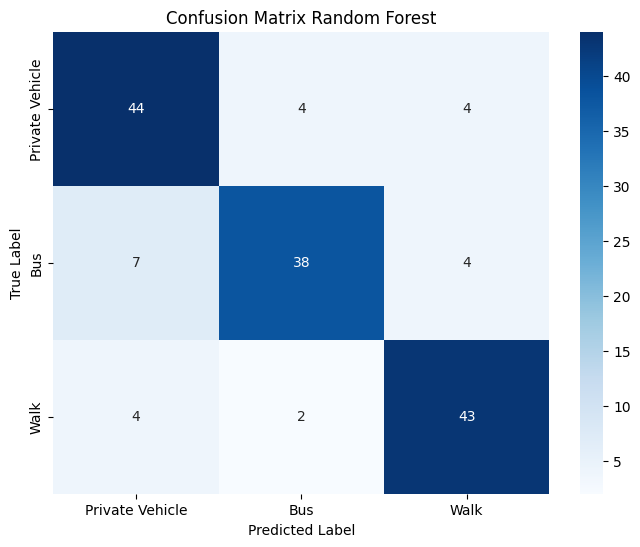

In [153]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_bag = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bag, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [154]:
param_grid = {
    'max_features': range(2, 28)
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 15}


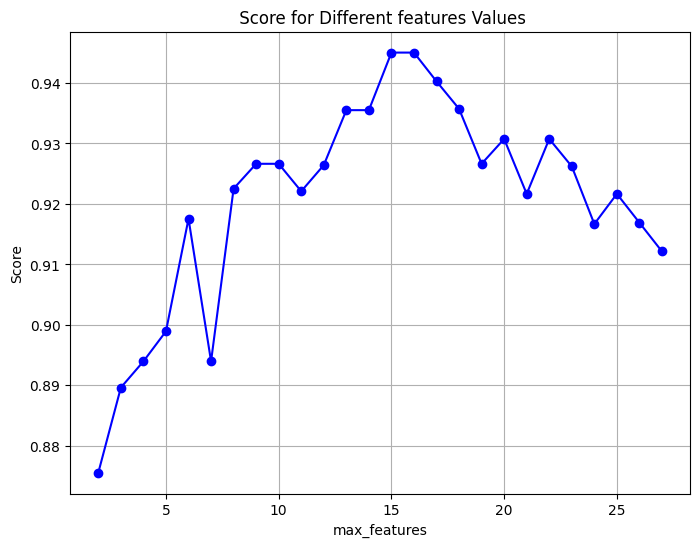

In [155]:
results = grid_search.cv_results_
rates = results['mean_test_score'] 
max_fetures = param_grid['max_features']
plt.figure(figsize=(8, 6))
plt.plot(max_fetures, rates, marker='o', linestyle='-', color='b')
plt.title(' Score for Different features Values')
plt.xlabel('max_features')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [156]:
param_grid = {
    'n_estimators': list(range(50, 400))}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'n_estimators': 200}


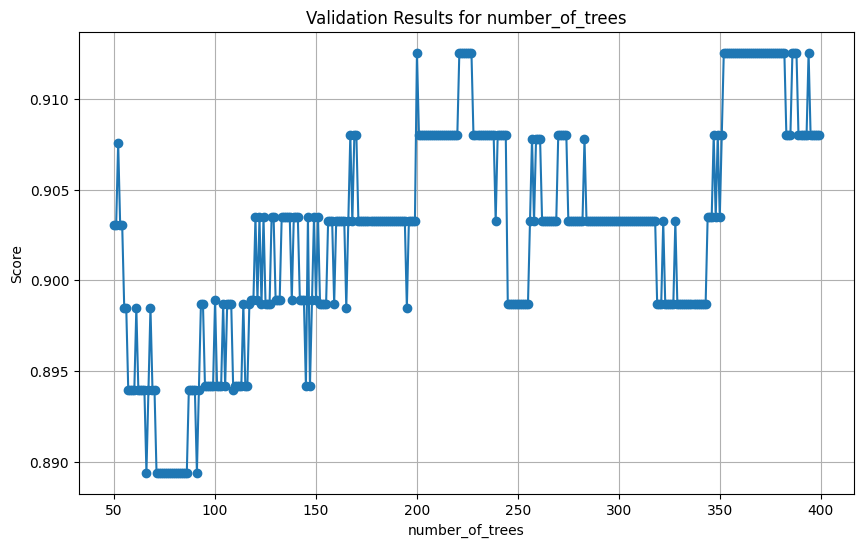

In [157]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [158]:
param_grid = {
    'n_estimators': list(range(130, 301)),
    'max_features': [15, 16]}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params_rf = grid_search.best_params_
print(best_params_rf)

{'max_features': 16, 'n_estimators': 233}


In [159]:
score = grid_search.best_score_
score

0.9541125541125541

In [160]:
random_forest = grid_search.best_estimator_
y_pred_rf_basic = random_forest.predict(X_test)
reportrfbasic = classification_report(y_test, y_pred_rf_basic)
print(reportrfbasic)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        52
           1       0.95      0.84      0.89        49
           2       0.85      0.96      0.90        49

    accuracy                           0.91       150
   macro avg       0.92      0.91      0.91       150
weighted avg       0.92      0.91      0.91       150



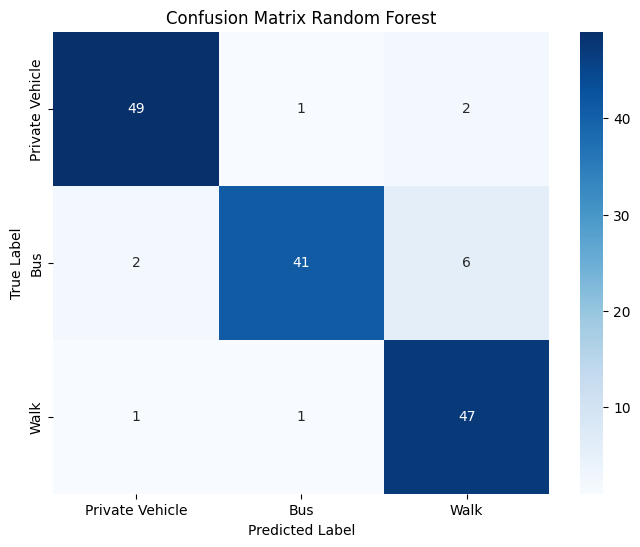

In [161]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_bag = confusion_matrix(y_test, y_pred_rf_basic)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_bag, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [162]:
X.columns

Index(['Gender', 'Truck_licence', 'Bike_access', 'Skate_access', 'Hsize',
       'Time', 'Convenience', 'Cost', 'Safety', 'Environment', 'Health',
       'Weather', 'Parking', 'Distance', 'Age_20 και κάτω', 'Age_21 - 30',
       'Age_31 -40', 'Age_41 - 50', 'Age_51 και άνω', 'Income_0 - 500',
       'Income_1000 - 1500', 'Income_1500 και ανω', 'Income_500 - 1000',
       'Depart_time_06.00 - 09.00', 'Depart_time_09.00 - 12.00',
       'Depart_time_12.00 - 15.00', 'Depart_time_other'],
      dtype='object')

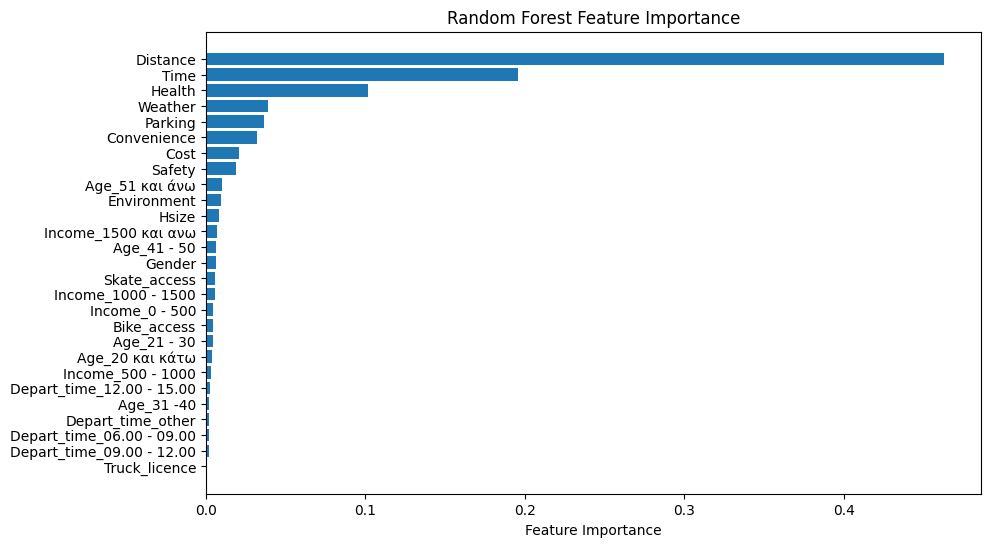

In [163]:
feature_importances = random_forest.feature_importances_

feature_names = ['Gender', 'Truck_licence', 'Bike_access', 'Skate_access', 'Hsize',
       'Time', 'Convenience', 'Cost', 'Safety', 'Environment', 'Health',
       'Weather', 'Parking', 'Distance', 'Age_20 και κάτω', 'Age_21 - 30',
       'Age_31 -40', 'Age_41 - 50', 'Age_51 και άνω', 'Income_0 - 500',
       'Income_1000 - 1500', 'Income_1500 και ανω', 'Income_500 - 1000',
       'Depart_time_06.00 - 09.00', 'Depart_time_09.00 - 12.00',
       'Depart_time_12.00 - 15.00', 'Depart_time_other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

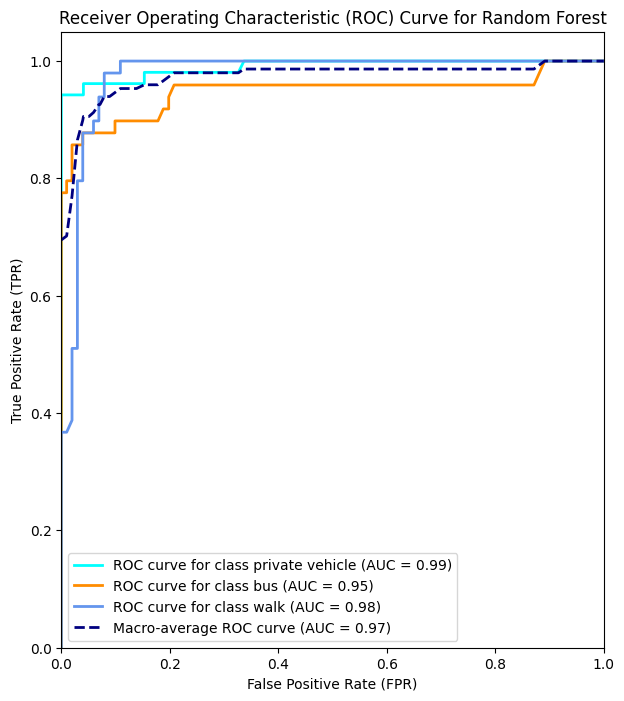

In [164]:
class_probabilities_rf = random_forest.predict_proba(X_test)
y_pred_prob_rf = np.argmax(class_probabilities_rf, axis=1)
y_test_bin_rf = label_binarize(y_test, classes=random_forest.classes_)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(random_forest.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_rf[:, i], class_probabilities_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(random_forest.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(random_forest.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(random_forest.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(random_forest.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Random Forest")

plt.show()

In [165]:
roc_auc['macro']

0.9725493333942371

# XGBoost

In [166]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42, n_estimators=100, subsample=1, colsample_bytree=1,  learning_rate=0.3)

In [167]:
xgb_classifier.fit(X_train, y_train)
y_pred_test = xgb_classifier.predict(X_test)
xgbreport = classification_report(y_test, y_pred_test)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        52
           1       0.91      0.88      0.90        49
           2       0.90      0.94      0.92        49

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150



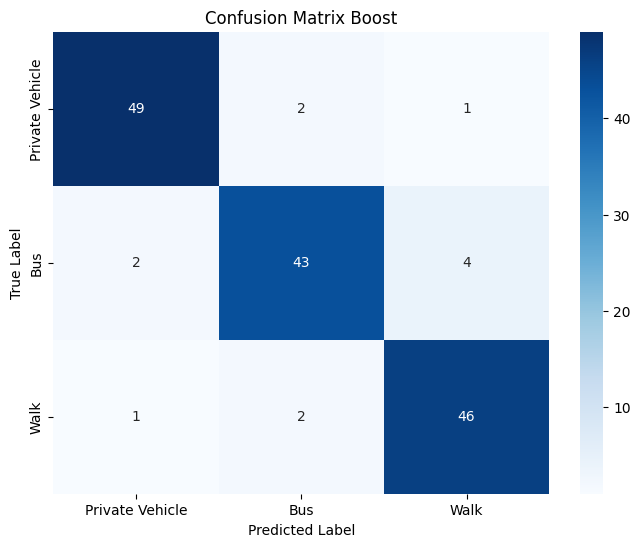

In [168]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [169]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

In [170]:
param_grid = {
    'n_estimators': list(range(50, 400)),
}

In [171]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

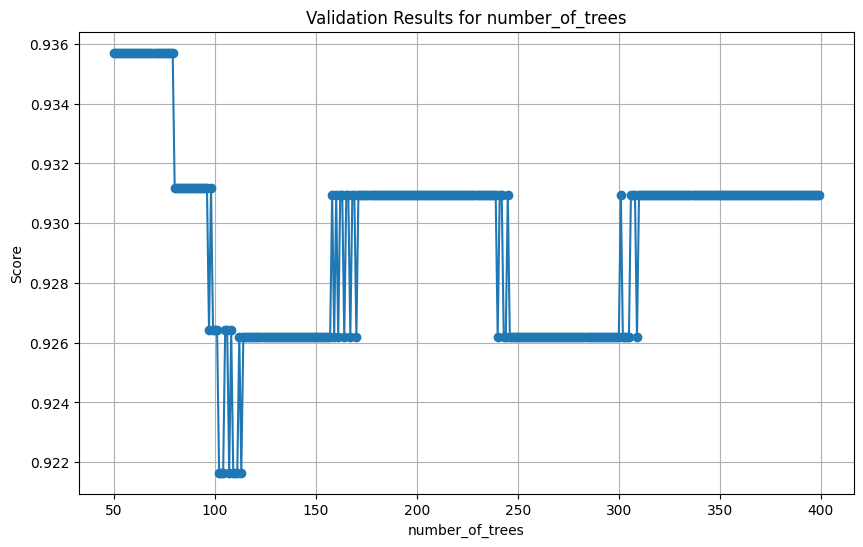

In [173]:
number_of_trees = grid_search.cv_results_['param_n_estimators']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('number_of_trees')
plt.ylabel('Score')
plt.title('Validation Results for number_of_trees')
plt.grid(True)
plt.show()

In [174]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

In [175]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

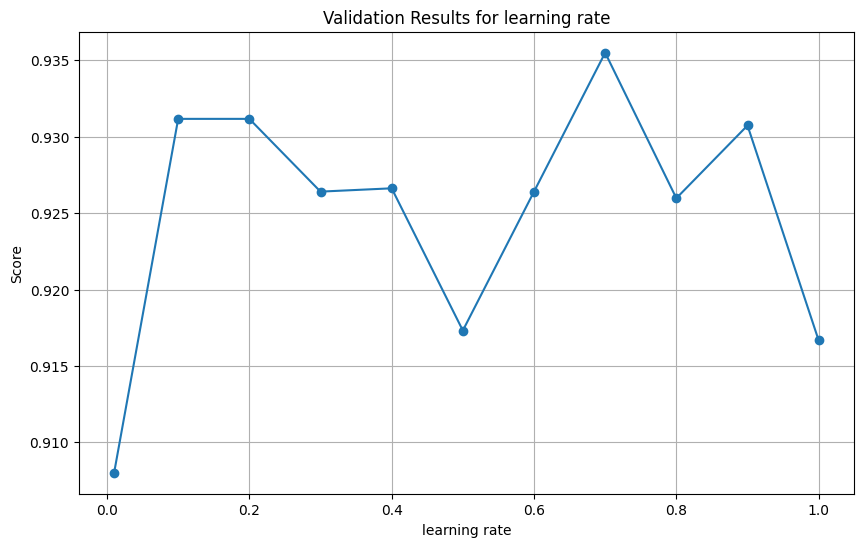

In [176]:
number_of_trees = grid_search.cv_results_['param_learning_rate']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('learning rate')
plt.ylabel('Score')
plt.title('Validation Results for learning rate')
plt.grid(True)
plt.show()

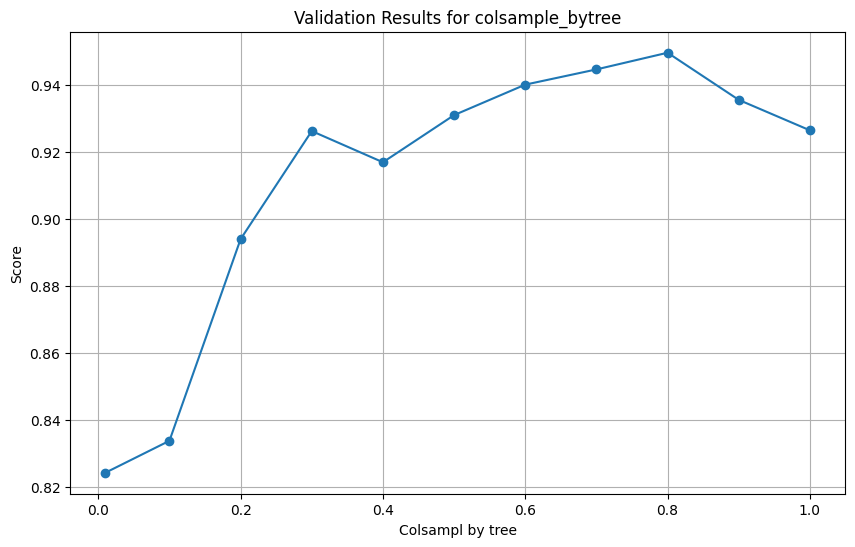

In [177]:
param_grid = {
    'colsample_bytree': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_colsample_bytree']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('Colsampl by tree')
plt.ylabel('Score')
plt.title('Validation Results for colsample_bytree')
plt.grid(True)
plt.show()

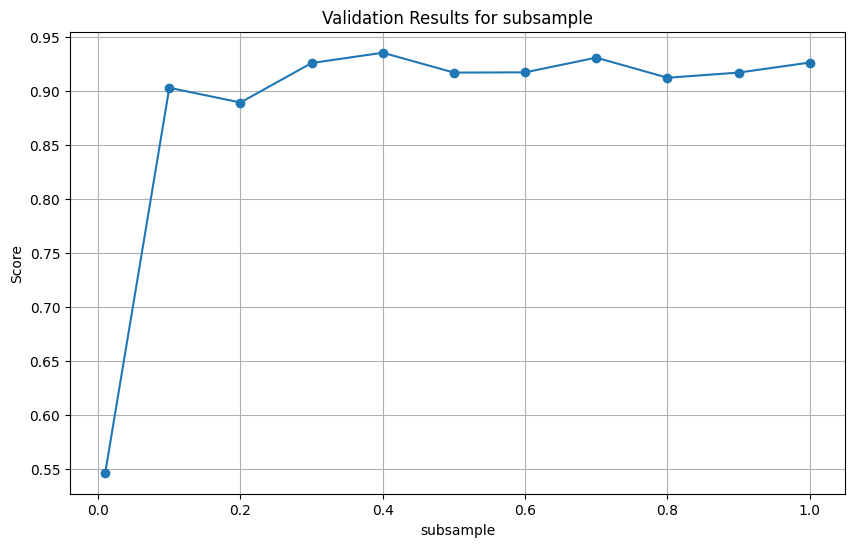

In [178]:
param_grid = {
    'subsample': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
number_of_trees = grid_search.cv_results_['param_subsample']
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(number_of_trees, mean_test_scores, marker='o', linestyle='-')
plt.xlabel('subsample')
plt.ylabel('Score')
plt.title('Validation Results for subsample')
plt.grid(True)
plt.show()

In [179]:
param_grid = {
    'n_estimators' : [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
    'subsample': [ 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'colsample_bytree' : [0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
    'learning_rate': [0.1, 0.2, 0.3, 0.7]}

In [180]:
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=10, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)

{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'n_estimators': 52, 'subsample': 0.7}


In [181]:
best_model = grid_search.best_estimator_

In [182]:
best_score = grid_search.best_score_
best_score

0.9541125541125541

In [183]:
y_pred_test = best_model.predict(X_test)
xgbreport = classification_report(y_test, y_pred_test)
print(xgbreport)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        52
           1       0.98      0.86      0.91        49
           2       0.86      0.98      0.91        49

    accuracy                           0.93       150
   macro avg       0.94      0.93      0.93       150
weighted avg       0.94      0.93      0.93       150



In [184]:
class_labels = ["Private Vehicle", "Bus", "Walk"]

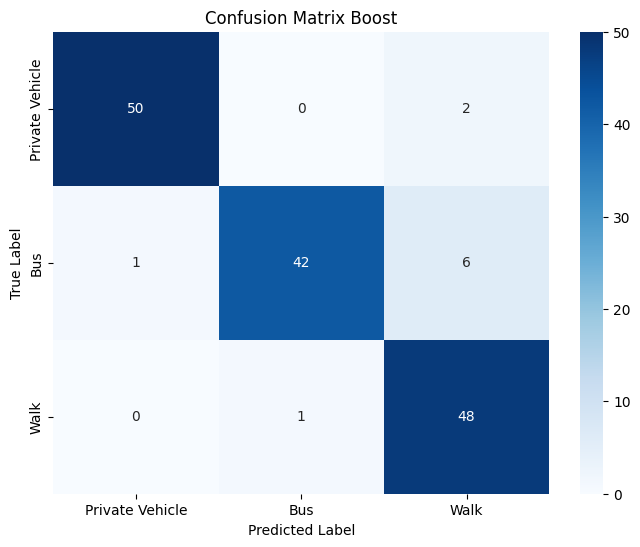

In [185]:
conf_matrix_ada = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix Boost')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

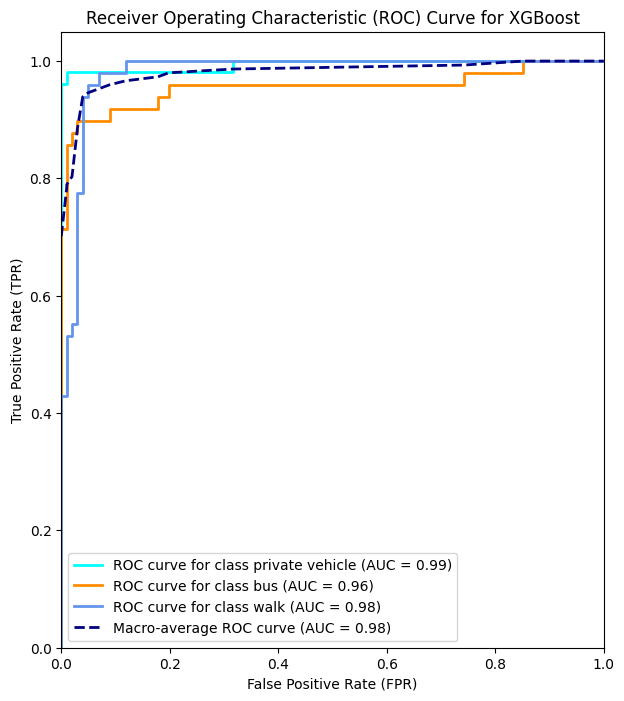

In [186]:
class_probabilities_xgb = best_model.predict_proba(X_test)
y_pred_prob_xgb = np.argmax(class_probabilities_xgb, axis=1)
y_test_bin_xgb = label_binarize(y_test, classes=best_model.classes_)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(best_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin_xgb[:, i], class_probabilities_xgb[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(best_model.classes_))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(best_model.classes_)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(best_model.classes_)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curve
_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(best_model.classes_, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for XGBoost")

plt.show()

In [187]:
roc_auc['macro']

0.9805053011148038

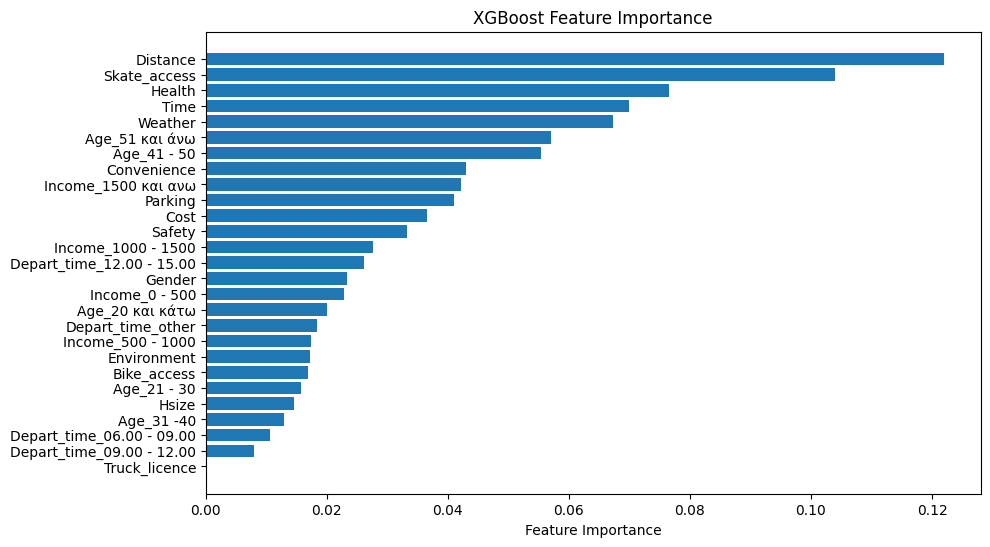

In [188]:
feature_importances = best_model.feature_importances_

feature_names = ['Gender', 'Truck_licence', 'Bike_access', 'Skate_access', 'Hsize',
       'Time', 'Convenience', 'Cost', 'Safety', 'Environment', 'Health',
       'Weather', 'Parking', 'Distance', 'Age_20 και κάτω', 'Age_21 - 30',
       'Age_31 -40', 'Age_41 - 50', 'Age_51 και άνω', 'Income_0 - 500',
       'Income_1000 - 1500', 'Income_1500 και ανω', 'Income_500 - 1000',
       'Depart_time_06.00 - 09.00', 'Depart_time_09.00 - 12.00',
       'Depart_time_12.00 - 15.00', 'Depart_time_other']


sorted_idx = np.argsort(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importance")
plt.show()

# Model Stack

In [189]:
X1.shape, X.shape

((373, 14), (373, 27))

In [190]:
X1.columns

Index(['Gender', 'Truck_licence', 'Bike_access', 'Skate_access', 'Hsize',
       'Time', 'Convenience', 'Cost', 'Safety', 'Environment', 'Health',
       'Weather', 'Parking', 'Distance'],
      dtype='object')

In [191]:
base_classifier1 = RandomForestClassifier(random_state=42,n_jobs=-1)
base_classifier2 = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
base_classifier3 = DecisionTreeClassifier(random_state=42)
meta_classifier = LogisticRegression(multi_class='ovr')
stacking_classifier = StackingCVClassifier(
    classifiers=[base_classifier1, base_classifier2, base_classifier3],
    meta_classifier=meta_classifier,
    cv=10,
    stratify=False,
    random_state=42
)
stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.95      0.80      0.87        49
           2       0.90      0.96      0.93        49

    accuracy                           0.91       150
   macro avg       0.91      0.91      0.90       150
weighted avg       0.91      0.91      0.91       150



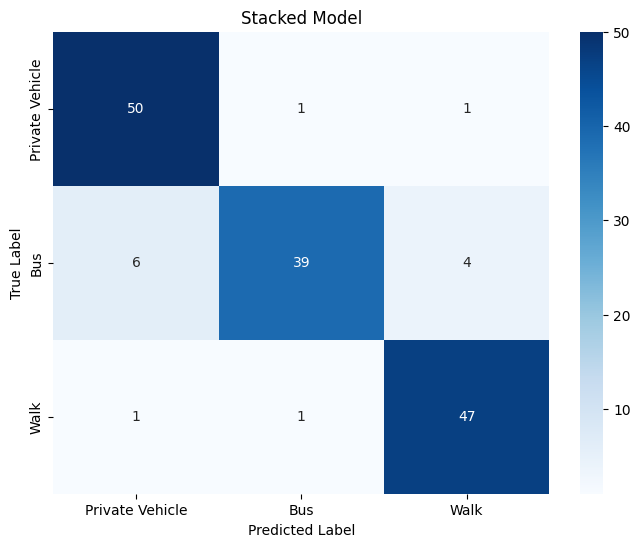

In [192]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_ada = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Stacked Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# We will use the optimal parameters of the previous models

In [194]:
base_classifier1 = RandomForestClassifier(random_state=42,n_jobs=-1,max_features=16, n_estimators=233)
base_classifier2 = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42,
                                    colsample_bytree= 0.8, learning_rate= 0.1, n_estimators= 52, subsample= 0.7)
base_classifier3 = DecisionTreeClassifier(random_state=42, max_depth= 7, min_samples_leaf= 3, min_samples_split= 8)
meta_classifier = LogisticRegression(multi_class='ovr')

stacking_classifier = StackingCVClassifier(
    classifiers=[base_classifier1, base_classifier2, base_classifier3],
    meta_classifier=meta_classifier,
    cv=10,
    stratify=False,
    random_state=123
)

stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.98      0.84      0.90        49
           2       0.86      0.98      0.91        49

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



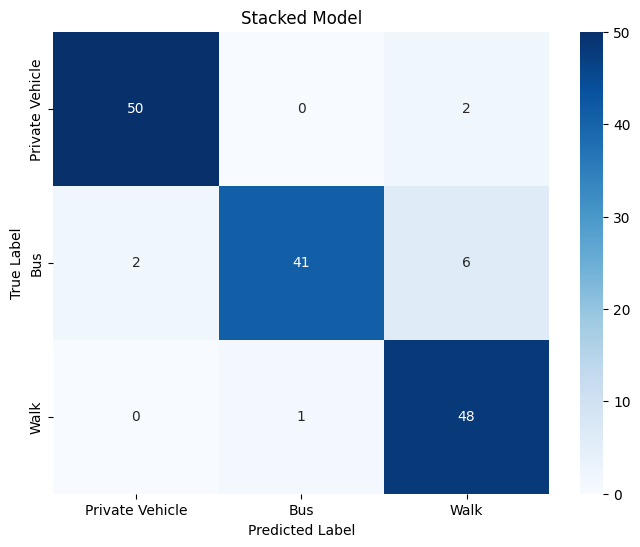

In [195]:
class_labels = ["Private Vehicle", "Bus", "Walk"]
conf_matrix_ada = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ada, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Stacked Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

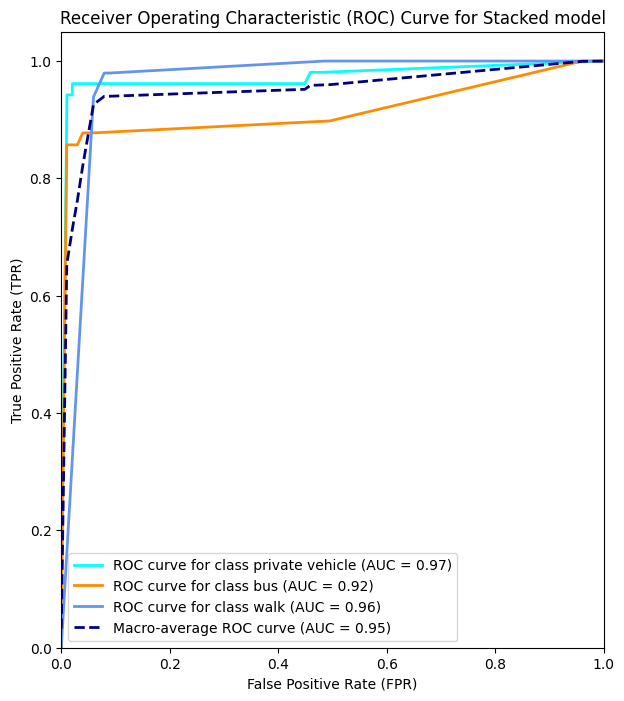

In [196]:
class_probabilities_st = stacking_classifier.predict_proba(X_test)
y_pred_prob_st = np.argmax(class_probabilities_st, axis=1)
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], class_probabilities_st[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

_, ax_roc = plt.subplots(figsize=(7, 8))
colors_roc = cycle(["aqua", "darkorange", "cornflowerblue"])

for i, (class_labels, color) in enumerate(zip(classes, colors_roc)):
    class_name = class_labels_mapping.get(i, f'class {i}')
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve for class {class_name} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["macro"], tpr["macro"], color='navy', lw=2, linestyle='--', label=f'Macro-average ROC curve (AUC = {roc_auc["macro"]:0.2f})')

ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate (FPR)')
ax_roc.set_ylabel('True Positive Rate (TPR)')
ax_roc.legend(loc="best")
ax_roc.set_title("Receiver Operating Characteristic (ROC) Curve for Stacked model")

plt.show()

In [197]:
roc_auc["macro"]

0.9502994647973431